> # `Dataset: Pima Indians Diabetes Database`
> # `URL: https://www.kaggle.com/uciml/pima-indians-diabetes-database`
> ## The accuracy of this model is:  76.623%

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

dataset=pd.read_csv('diabetes.data')
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataset.shape

(768, 9)

In [ ]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# taking the transpose of the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Minimum value is observed to be 0 for Glucose, BloodPressure,SkinThickness,Insulin, BMI 
# The same can be observed in the histograms that follows
# This cannot be true that means ..they are incorrect values and we deal with the incorrect values by first replacing 
# the 0's with nan's


dataset_copy =dataset.copy(deep=True)
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(to_replace=0,value=np.NaN)     
 
print(dataset_copy.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


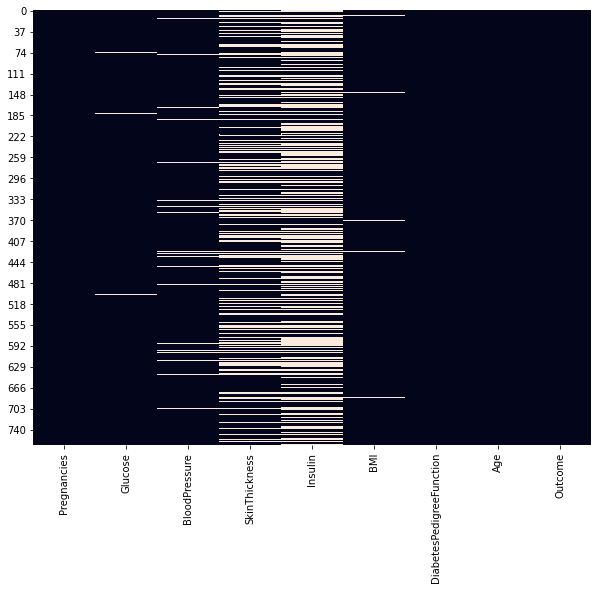

In [ ]:
# visualise the missing data
sns.heatmap(dataset_copy.isnull(),cbar=False)
fig =plt.gcf()
fig.set_size_inches(10,8)


In [ ]:
len(dataset_copy.index)

768

In [ ]:
# With so much of Missing data in the columns : Insulin and then SkinThickness, it is better to drop these two columns
# Let us see what's the percentage of missing data
def missing(data):
    print("Missing values in %")
    print(round(((data.isnull().sum() * 100)/ len(data)),2).sort_values(ascending=False))
    
missing(dataset_copy)    


Missing values in %
Insulin                     48.70
SkinThickness               29.56
BloodPressure                4.56
BMI                          1.43
Glucose                      0.65
Outcome                      0.00
Age                          0.00
DiabetesPedigreeFunction     0.00
Pregnancies                  0.00
dtype: float64


In [ ]:
# clearly Insulin has Most of the missing data. We drop this column for the analysis purpose and see how 
# it impacts out prediction model

In [ ]:
dataset_copy2 = dataset_copy.drop(columns=['Insulin'], axis=1)
dataset_copy2.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


In [ ]:
# To fill these NaNs, the data distribution needs to be understood

In [ ]:
# Dataset Correlation Matrix
corr=dataset_copy2.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.648214,0.115016,0.166816,0.259491
BMI,0.021719,0.232771,0.289230,0.648214,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.313680,0.173844,0.238356,1.000000


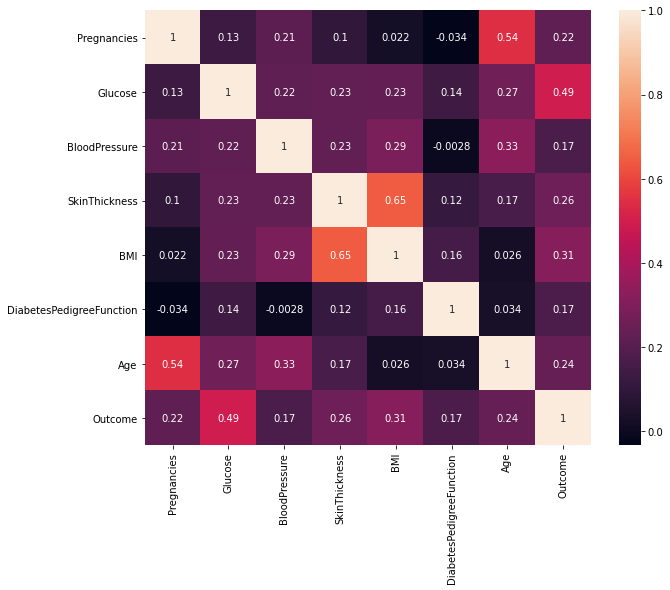

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr,annot=True)
fig =plt.gcf()
fig.set_size_inches(10,8)
plt.show()

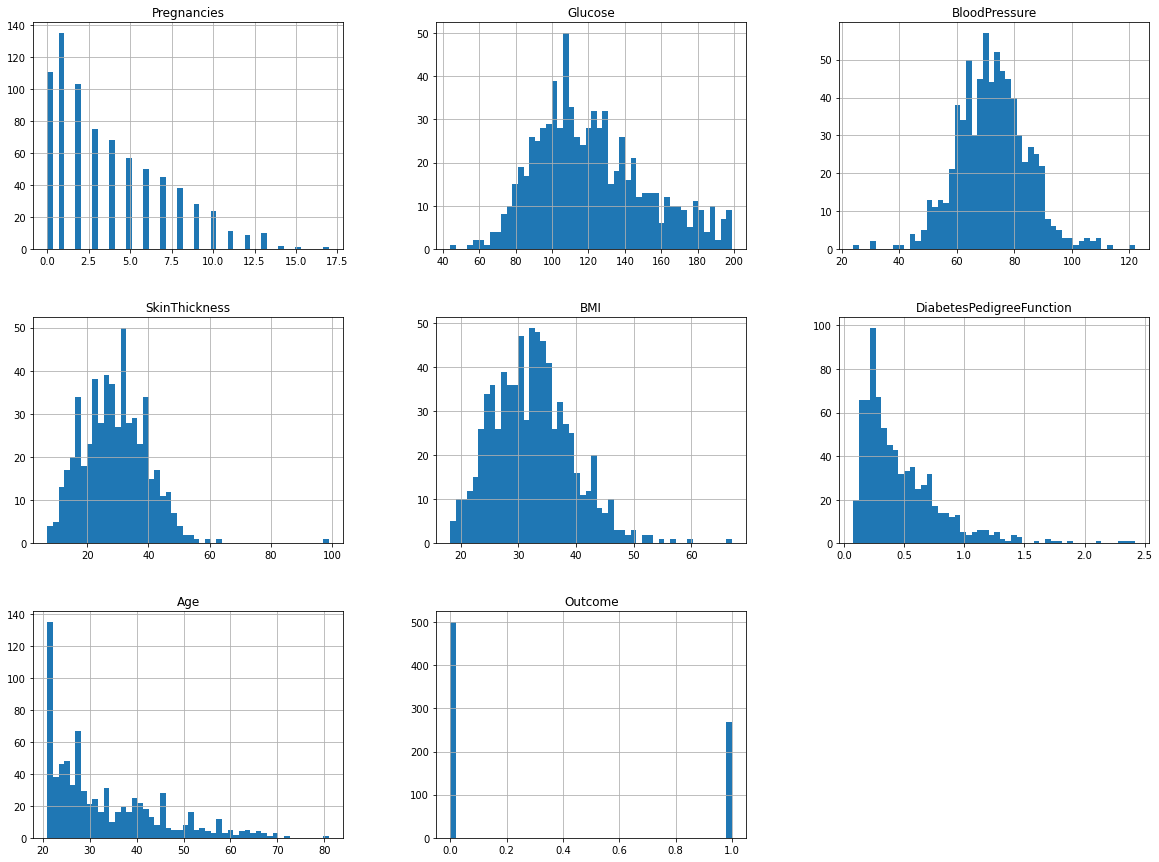

In [ ]:
# Now we shall visualise the data to have a better understanding of the various features values distribution

dataset_copy2.hist(bins=50,figsize=(20,15))
plt.show()

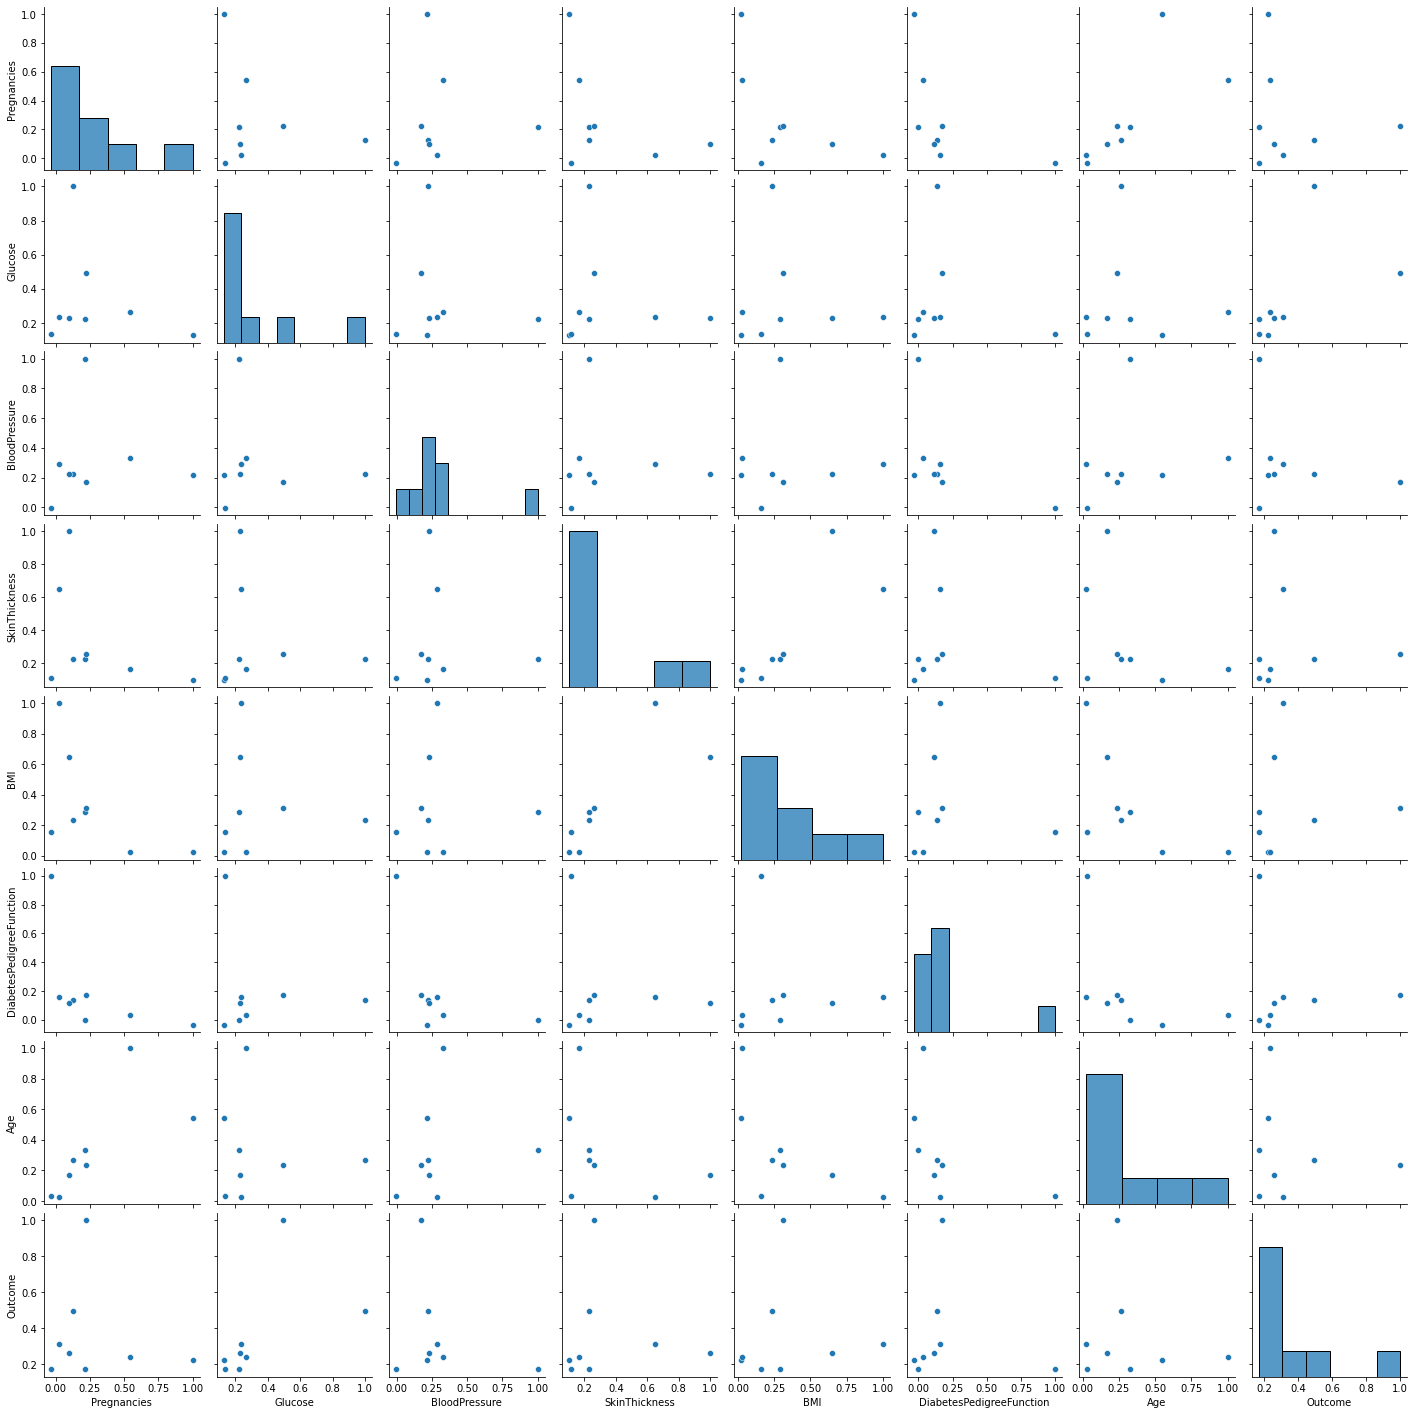

In [ ]:
sns.pairplot(corr)

In [ ]:
# check for missing data
# dataset.isnull().sum() # actual data set 
dataset_copy2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Data Cleaning: Here we deal with missing data or some incorrect data because Machine learning Algorithms cannot 
properly with such type of data

In [ ]:
# The data visualisation has helped us in better way otherwise we would not have obtained the incorrect data present 
# in the dataset. We cannot just eliminate the patients wit null/zero values. This would remove a lot of important 
# data. Another way if to calculate the mean value for a column and substitute the value

In [ ]:
# Imputing the nan values for the columns in accordance with their distribution, we get


In [ ]:

dataset_copy2['Glucose'].fillna(dataset_copy2['Glucose'].mean(), inplace = True)
dataset_copy2['BloodPressure'].fillna(dataset_copy2['BloodPressure'].mean(), inplace = True)
dataset_copy2['SkinThickness'].fillna(dataset_copy2['SkinThickness'].mean(), inplace = True)
#dataset_copy2['Insulin'].fillna(dataset_copy2['Insulin'].mean(), inplace = True)
dataset_copy2['BMI'].fillna(dataset_copy2['BMI'].mean(), inplace = True)

# Number of Pregnancy can be 0 - so we do not do transformation on that feature


In [ ]:
dataset_copy2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

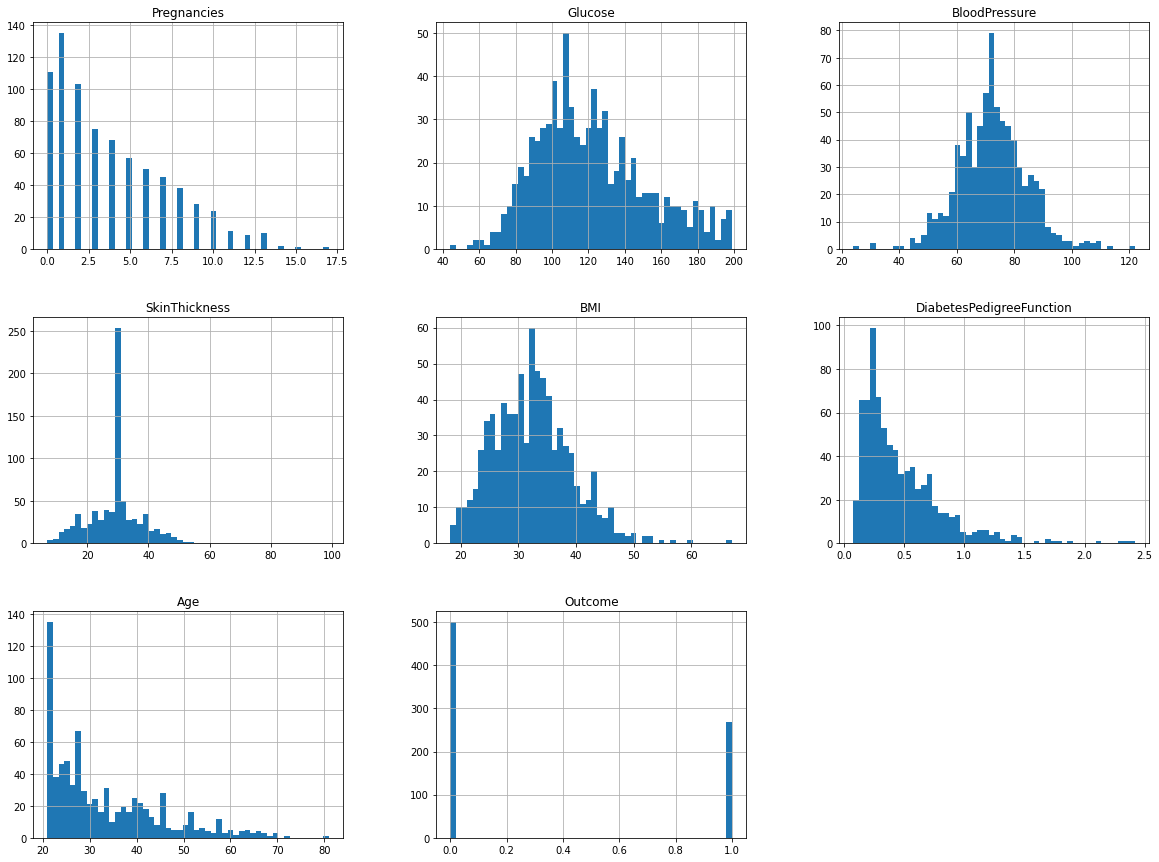

In [ ]:
#Plotting after NaN removal

dataset_copy2.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# Splitting the data into training set and Test Set

dataset_copy2.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,43.1,2.288,33,1


In [ ]:

X=dataset_copy2.iloc[:,0:7].values
y=dataset_copy2.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc_X = StandardScaler()
#sc_X =MinMaxScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [ ]:
## import all the algorithms we want to test
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=100000000, hidden_layer_sizes=(9,2),activation='relu',learning_rate_init=0.0001)
mlp.fit(X_train,y_train)
pred=mlp.predict(X_test)
pred


## Fitting Naive Bayes to the Training set
#from sklearn.naive_bayes import GaussianNB
#classifier = GaussianNB()
#classifier.fit(X_train, y_train)

# from sklearn.svm import SVC
# classifier = SVC(kernel='linear')
# classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = mlp.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import accuracy_score
print('The accuracy of this model is: ', accuracy_score(y_pred, y_test))

[[92 17]
 [19 26]]
The accuracy of this model is:  0.7662337662337663


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.60      0.58      0.59        45

    accuracy                           0.77       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.76      0.77      0.76       154



## The accuracy of this model is:  76.623%